In [1]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix,roc_curve, roc_auc_score,classification_report
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [6]:
data = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/winequality-red.csv')
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [7]:
data_dup = pd.read_csv('https://raw.githubusercontent.com/training-ml/Files/main/wine.csv')
data_dup.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,Alcohol_content,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Low,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,Medium,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,Medium,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,Medium,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Low,5


In [8]:
data.shape

(1599, 12)

In [10]:
data.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [11]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


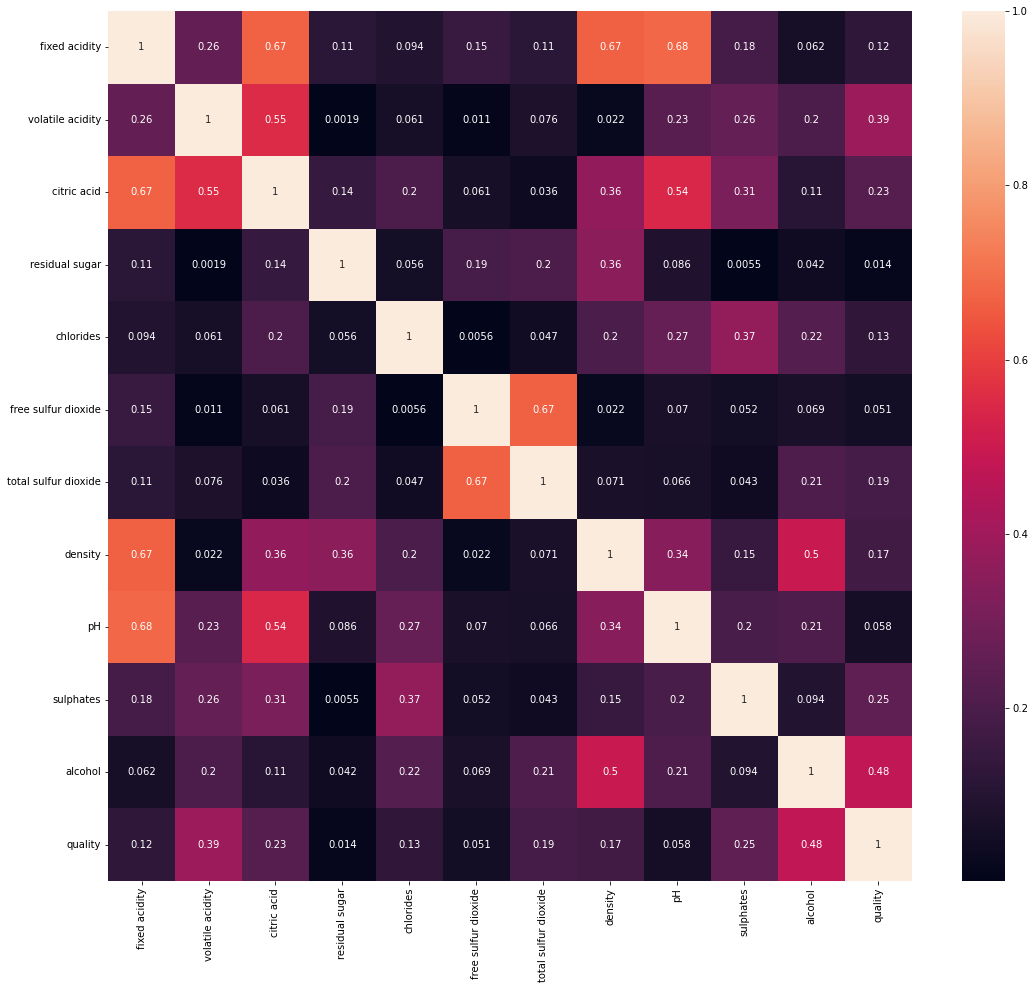

In [14]:
#plotting Heatmap
df_corr = data.corr().abs()  #this will calculate the co-effient between the features

plt.figure(figsize =(18, 16))
sns.heatmap(df_corr, annot = True, annot_kws={'size' :10})
plt.show()

In [16]:
x= data.drop(columns = ['quality'])
y= data.quality

In [17]:
x_train,x_test,y_train,y_test = train_test_split(x, y, train_size = 80, random_state = 40)

In [36]:
def metric_score (dt,x_train, y_train, x_test, y_test, train=True):
    if train:
        y_pred = dt.predict (x_train)
        print("\n----------------Train Result----------------")
        print(f"Accuracy Score: {accuracy_score(y_train, y_pred)*100:.2f}%")

    elif train ==False:
        y_pred_test = dt.predict (x_test)
        print("\n----------------Test Result----------------")
        print(f"Accuracy Score: {accuracy_score(y_test, y_pred_test)*100:.2f}%")

        print("\n Test Classification Report -\n", classification_report(y_test, y_pred_test, digits = 2))

In [19]:
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [37]:
metric_score(dt,x_train,y_train,x_test,y_test, train = True)
metric_score(dt,x_train,y_train,x_test,y_test, train = False)


----------------Train Result----------------
Accuracy Score: 71.25%

----------------Test Result----------------
Accuracy Score: 50.30%

 Test Classification Report -
               precision    recall  f1-score   support

           3       0.00      0.00      0.00        10
           4       0.00      0.00      0.00        50
           5       0.65      0.67      0.66       647
           6       0.49      0.37      0.42       606
           7       0.27      0.55      0.36       188
           8       0.00      0.00      0.00        18

    accuracy                           0.50      1519
   macro avg       0.23      0.27      0.24      1519
weighted avg       0.51      0.50      0.49      1519



In [26]:
# parameter tuning
grid_param ={'criterion' : ['entropy', 'gini'],
            'max_depth' : range(10,15),
            'min_samples_leaf' : range(2,6),
            'min_samples_split' : range(3,8),
            'max_leaf_nodes' : range(5,10)}

In [27]:
grid_search = GridSearchCV(estimator = dt, param_grid= grid_param, cv=5, n_jobs=-1)

In [28]:
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(max_depth=10, max_leaf_nodes=5,
                                              min_samples_leaf=2,
                                              min_samples_split=3),
             n_jobs=-1,
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': range(10, 15),
                         'max_leaf_nodes': range(5, 10),
                         'min_samples_leaf': range(2, 6),
                         'min_samples_split': range(3, 8)})

In [29]:
best_parameter = grid_search.best_params_
best_parameter

{'criterion': 'gini',
 'max_depth': 10,
 'max_leaf_nodes': 5,
 'min_samples_leaf': 2,
 'min_samples_split': 3}

In [30]:
dt = DecisionTreeClassifier(criterion= 'gini',
 max_depth= 10,
 max_leaf_nodes= 5,
 min_samples_leaf= 2,
 min_samples_split= 3)

In [31]:
dt.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=10, max_leaf_nodes=5, min_samples_leaf=2,
                       min_samples_split=3)

In [38]:
metric_score(dt,x_train,y_train,x_test,y_test, train = True)
metric_score(dt,x_train,y_train,x_test,y_test, train = False)


----------------Train Result----------------
Accuracy Score: 71.25%

----------------Test Result----------------
Accuracy Score: 50.30%

 Test Classification Report -
               precision    recall  f1-score   support

           3       0.00      0.00      0.00        10
           4       0.00      0.00      0.00        50
           5       0.65      0.67      0.66       647
           6       0.49      0.37      0.42       606
           7       0.27      0.55      0.36       188
           8       0.00      0.00      0.00        18

    accuracy                           0.50      1519
   macro avg       0.23      0.27      0.24      1519
weighted avg       0.51      0.50      0.49      1519

